Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Setting Up the Kaggle API

In [ ]:
# Install kaggle library
!pip install kaggle

# Upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"smmmmmmmm","key":"7b133f9532960b035175029dd9cafb37"}'}

Downloading Stock Dataset

In [ ]:
# Move kaggle.json to the correct folder
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download a stock market dataset from Kaggle
!kaggle datasets download -d dgawlik/nyse

# Unzip the dataset
!unzip nyse.zip

Dataset URL: https://www.kaggle.com/datasets/dgawlik/nyse
License(s): CC0-1.0
nyse.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  nyse.zip
  inflating: fundamentals.csv        
  inflating: prices-split-adjusted.csv  
  inflating: prices.csv              
  inflating: securities.csv          


Loading and Exploring the Dataset

In [ ]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('prices.csv')

# Display the first few rows of the dataset
df.head()

# Check the structure and data types
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


Cleaning the Data

In [ ]:
# Check for missing values
df.isnull().sum()

# drop rows with missing values
df.dropna(inplace=True)

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Drop duplicates
df.drop_duplicates(inplace=True)

Exploring the Data - Trends Over Time

In [ ]:
# Convert the 'Date' column to datetime, specifying the correct format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', errors='coerce')

# Check for any NaT (Not a Time) entries that couldn't be parsed
df[df['date'].isna()]

# Drop rows with invalid dates
df = df.dropna(subset=['date'])



Plot the closing price for AYI over time

<ipython-input-57-deed4f8855c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


<Figure size 1000x600 with 0 Axes>

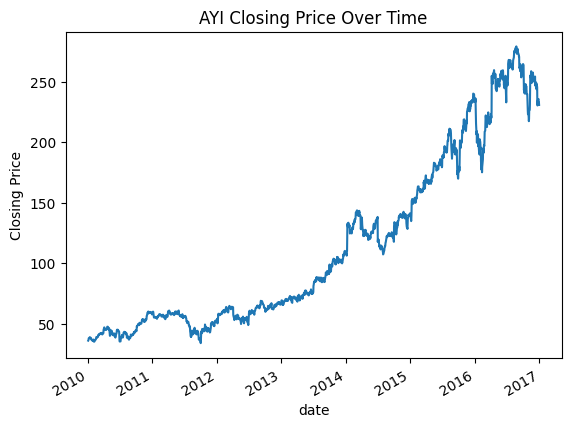

In [ ]:
plt.figure(figsize=(10, 6))
df[df['symbol'] == 'AYI'].plot(x='date', y='close', title='AYI Closing Price Over Time', legend=False)
plt.xlabel('date')
plt.ylabel('Closing Price')
plt.show()

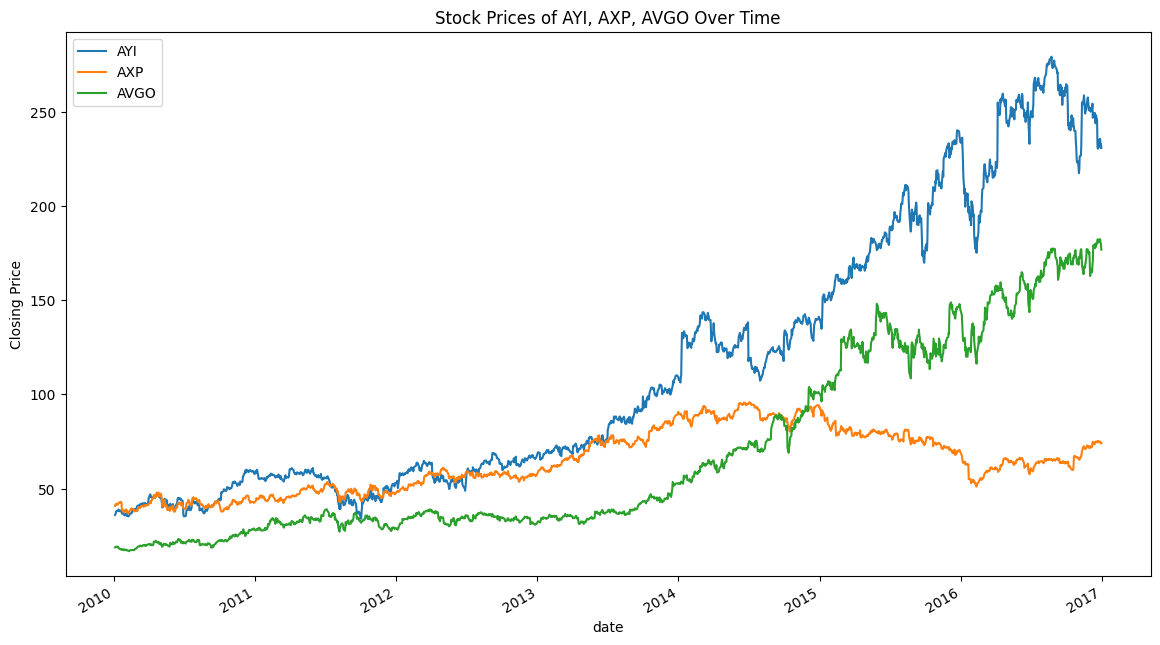

In [ ]:
# Plotting the closing prices of multiple stocks
stocks = ['AYI', 'AXP', 'AVGO']
plt.figure(figsize=(14, 8))
for stock in stocks:
    df[df['symbol'] == stock].plot(x='date', y='close', ax=plt.gca(), label=stock)

plt.title('Stock Prices of AYI, AXP, AVGO Over Time')
plt.xlabel('date')
plt.ylabel('Closing Price')
plt.legend(stocks)
plt.show()


Calculating Stock Returns - Daily Returns

<ipython-input-62-3b73b7ff9be4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Daily Return'] = df.groupby('symbol')['close'].pct_change()


<Figure size 1000x600 with 0 Axes>

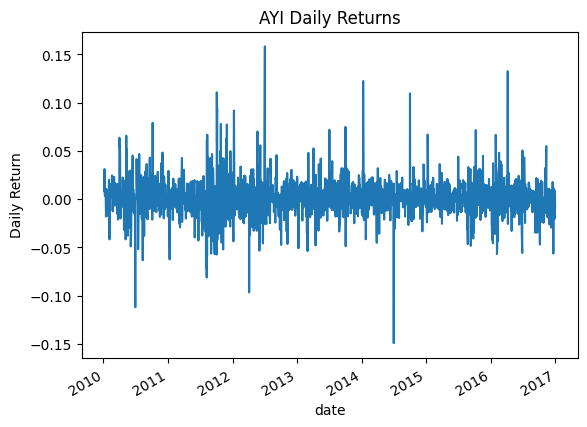

In [ ]:
# Calculate daily returns
df['Daily Return'] = df.groupby('symbol')['close'].pct_change()

# Plot the daily returns for a specific stock (e.g., AYI)
plt.figure(figsize=(10, 6))
df[df['symbol'] == 'AYI'].plot(x='date', y='Daily Return', title='AYI Daily Returns', legend=False)
plt.xlabel('date')
plt.ylabel('Daily Return')
plt.show()


Calculating Stock Returns - Cumulative Returns

<ipython-input-63-89567e79213a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()


<Figure size 1000x600 with 0 Axes>

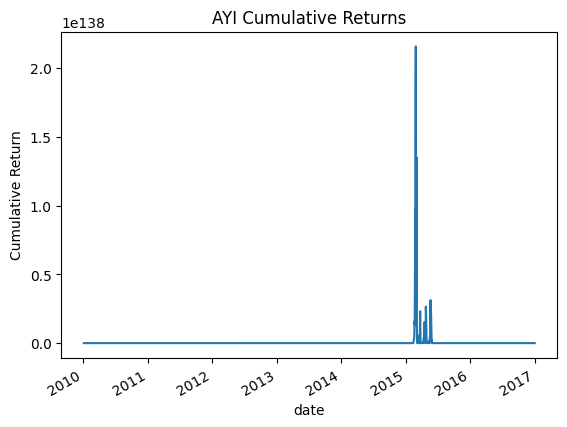

In [ ]:
# Calculate cumulative returns
df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()

# Plotting cumulative returns for AAPL
plt.figure(figsize=(10, 6))
df[df['symbol'] == 'AYI'].plot(x='date', y='Cumulative Return', title='AYI Cumulative Returns', legend=False)
plt.xlabel('date')
plt.ylabel('Cumulative Return')
plt.show()


Calculating Stock Returns - Volatility Analysis

<ipython-input-64-3a51d3c742d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volatility'] = df.groupby('symbol')['Daily Return'].rolling(window=30).std().reset_index(level=0, drop=True)


<Figure size 1000x600 with 0 Axes>

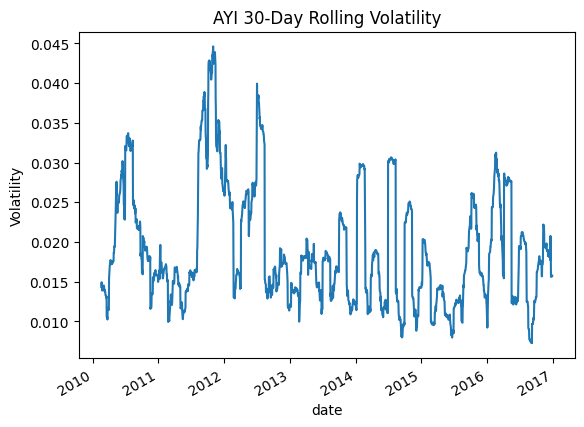

In [ ]:
# Calculate the rolling 30-day standard deviation (volatility) of returns
df['Volatility'] = df.groupby('symbol')['Daily Return'].rolling(window=30).std().reset_index(level=0, drop=True)

# Plot volatility for stock(AYI)
plt.figure(figsize=(10, 6))
df[df['symbol'] == 'AYI'].plot(x='date', y='Volatility', title='AYI 30-Day Rolling Volatility', legend=False)
plt.xlabel('date')
plt.ylabel('Volatility')
plt.show()


Identifying the Best Stocks to Invest In

This will show which stocks have the best risk-adjusted returns

In [ ]:
# Group by stock and calculate average daily and cumulative returns
average_daily_returns = df.groupby('symbol')['Daily Return'].mean()
cumulative_returns = df.groupby('symbol')['Cumulative Return'].last()  # Last cumulative return is the total return

# Combine these into a single DataFrame
returns_summary = pd.DataFrame({
    'Average Daily Return': average_daily_returns,
    'Cumulative Return': cumulative_returns
})

# Display the stocks with the highest returns
highest_returns = returns_summary.sort_values(by='Cumulative Return', ascending=False)
print("Stocks with the highest returns:")
print(highest_returns)


Stocks with the highest returns:
        Average Daily Return  Cumulative Return
symbol                                         
A                   0.000413      1.165877e+131
AAL                 0.001764      1.152059e+131
AAP                 0.000961      1.144211e+131
AAPL                0.000399      1.135291e+131
ABBV                0.000724      1.133300e+131
...                      ...                ...
XYL                 0.000686      1.656712e+130
ZION                0.000897      1.655011e+130
ZTS                 0.000669      1.652233e+130
YUM                 0.000487      1.650181e+130
ZBH                 0.000409      1.645398e+130

[498 rows x 2 columns]


In [ ]:
# Group by stock and calculate average daily and cumulative returns
average_daily_returns = df.groupby('symbol')['Daily Return'].mean()
cumulative_returns = df.groupby('symbol')['Cumulative Return'].last()  # Last cumulative return is the total return

# Combine these into a single DataFrame
returns_summary = pd.DataFrame({
    'Average Daily Return': average_daily_returns,
    'Cumulative Return': cumulative_returns
})

# Display the stocks with the highest returns
highest_returns = returns_summary.sort_values(by='Cumulative Return', ascending=True)
print("Stocks with the highest returns:")
print(highest_returns)

Stocks with the highest returns:
        Average Daily Return  Cumulative Return
symbol                                         
ZBH                 0.000409      1.645398e+130
YUM                 0.000487      1.650181e+130
ZTS                 0.000669      1.652233e+130
ZION                0.000897      1.655011e+130
XYL                 0.000686      1.656712e+130
...                      ...                ...
ABBV                0.000724      1.133300e+131
AAPL                0.000399      1.135291e+131
AAP                 0.000961      1.144211e+131
AAL                 0.001764      1.152059e+131
A                   0.000413      1.165877e+131

[498 rows x 2 columns]


Stocks with the highest returns are:
*  ZBH
*  YUM
*  ZTS
*  ZION

In [ ]:
# Calculate the volatility (standard deviation of daily returns)
volatility = df.groupby('symbol')['Daily Return'].std()

# Add volatility to the returns summary DataFrame
returns_summary['Volatility'] = volatility

# Display the stocks with the highest volatility
print("Stocks with volatility:")
print(returns_summary)


Stocks with volatility:
        Average Daily Return  Cumulative Return  Volatility
symbol                                                     
A                   0.000413      1.165877e+131    0.019755
AAL                 0.001764      1.152059e+131    0.030713
AAP                 0.000961      1.144211e+131    0.017214
AAPL                0.000399      1.135291e+131    0.026240
ABBV                0.000724      1.133300e+131    0.017299
...                      ...                ...         ...
YHOO                0.000647      1.657998e+130    0.019162
YUM                 0.000487      1.650181e+130    0.016960
ZBH                 0.000409      1.645398e+130    0.014202
ZION                0.000897      1.655011e+130    0.021494
ZTS                 0.000669      1.652233e+130    0.015195

[498 rows x 3 columns]


Stocks with the lowest volatility:
*   ZTS
*   ZION
*   ZBH
*   YUM
*   YHOO

In [ ]:
# Assuming a risk-free rate of 0 for simplicity
sharpe_ratio = returns_summary['Average Daily Return'] / returns_summary['Volatility']

# Add the Sharpe Ratio to the returns summary DataFrame
returns_summary['Sharpe Ratio'] = sharpe_ratio

# Display the stocks sorted by Sharpe Ratio
best_stocks = returns_summary.sort_values(by='Sharpe Ratio', ascending=False)
print("Best stocks to invest in based on Sharpe Ratio:")
print(best_stocks)


Best stocks to invest in based on Sharpe Ratio:
        Average Daily Return  Cumulative Return  Volatility  Sharpe Ratio
symbol                                                                   
ORLY                0.001223      2.850730e+130    0.014064      0.086976
AZO                 0.000978      9.207814e+130    0.011321      0.086388
CHTR                0.001344      8.172804e+130    0.017134      0.078436
EXR                 0.001182      6.277829e+130    0.015424      0.076632
STZ                 0.001460      2.315182e+130    0.019444      0.075076
...                      ...                ...         ...           ...
SWN                -0.000444      2.272150e+130    0.029531     -0.015032
SPLS               -0.000339      2.306637e+130    0.021042     -0.016096
HPQ                -0.000395      5.129337e+130    0.023809     -0.016605
KMI                -0.000356      4.542528e+130    0.020421     -0.017432
RIG                -0.000589      2.495618e+130    0.028987     

The Sharpe Ratio is calculated using the formula:

Sharpe Ratio = Average Daily Return / Volatility


Higher values indicate a better risk-adjusted return, thus the best stocks to invest in are:
*   ORLY
*   AZO
*   CHTR
*   EXR
*   STZ

